# Исследование рынка видеоигр

Интернет-магазин 'Стримчик', который продаёт видеоигры по всему миру, планирует рекламные кампании на следующий, 2017, год. Перед нами стоит задача изучить предоставленные исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах, и выявить определяющие успешность игры закономерности.  
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования**
1. Провести исследовательский анализ данных:  
- Посмотреть, сколько игр выпускалось в разные годы, как менялись продажи по платформам. 
- Изучить, какие платформы лидируют по продажам, растут или падают за актуальный период. Выберем несколько потенциально прибыльных платформ.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Посмотреть на общее распределение игр по жанрам: выделяются ли жанры с высокими и низкими продажами, какие жанры можно назвать самыми прибыльными.  

2. Составить портрет пользователя каждого региона:    
- Определить для пользователя каждого региона (NA, EU, JP):
  1. Самые популярные платформы (топ-5).   
  2. Самые популярные жанры (топ-5).   
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

3. Проверить гипотезы:  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования** 

1. Обзор данных, изучение общей информации
2. Предобработка данных, подготовка к дальнейшему анализу
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод


## Шаг 1. Обзор данных

Для начала мы ознакомимся с данными и изучим документацию к ним

In [1]:
# Импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Прочитаем файл, сохраним его в переменной df
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
pd.set_option('display.max_columns', None)

# Получим общую информацию о таблице df
df.info()
# Выведем на экран первые 10 строк таблицы df
display(df.head(10))
# Получим числовое описание данных в таблице df
df.describe()
# Проверим на дубликаты
print(f'Количество дубликатов в данных: {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Количество дубликатов в данных: 0


**Согласно документации к данным:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Также в документации указано, что данные за 2016 год могут быть неполными.

**Первые выводы**

В каждой строке таблицы -- данные о видеоигре: название, платформа, на которой она выпущена, год выпуска, жанр, информация о продажах в разных регионах, оценки критиков и пользователей, а также рейтинг, определяющий подходящую возрастную категорию для видеоигры. 
1. В таблице представлена информация о 16 715 выдеоиграх, выпущенных с 1980 по 2016 год.
2. В нескольких столбцах присутствуют пропуски, которые нам предстоит изучить и обработать.
3. В названиях колонок встречается нарушение стиля.
4. Типы данных в некоторых столбцах необходимо изменить.
5. Дубликаты в данных отсутствуют


## Шаг 2. Предобработка данных

Для последующей обработки данных и проверки гипотез на этом шаге нам предстоит:
* Исправить нарушение стиля в названии столбцов
* Изменить типы данных там, где это необходимо
* Изучить и обработать пропуски
* Проверить данные на явные и неявные дубликаты
* Выделить дополнительную колонку с суммой продаж во всех регионах

В первую очередь мы изменим наименования колонок, согласно правилам хорошего стиля:

In [3]:
# Приведём все названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

df.columns  # Для проверки выведем названия колонок на экран

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Посчитаем общее количество пропущенных значений:

In [4]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Далее мы рассмотрим каждый столбец по отдельности: изучим пропуски, приведём к нужному типу данных там, где это необходимо.

Но для начала создадим функцию для описания данных в каждом столбце.

In [5]:
def data_review(column):
    print(f'Количество пропусков в данных: {column.isna().sum()}')         
    print(f'Тип данных: {column.dtypes}')   

### Название игры

In [6]:
data_review(df['name'])

Количество пропусков в данных: 2
Тип данных: object


In [7]:
df[pd.isna(df['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В колонке с названием игр присутствуют 2 пропуска. Мы вывели строки с пропущенными значениями на экран, и увидели, что в этих строках также пропущены данные в ключевых в рамках нашего исследования столбцах: c жанром, оценками пользователей и критиков, а также возрастном рейтинге. Мы исключим эти строки из датафрейма.

In [8]:
df = df.dropna(subset=['name']).reset_index(drop=True)

data_review(df['name'])

Количество пропусков в данных: 0
Тип данных: object


### Игровая платформа

In [9]:
data_review(df['platform'])

Количество пропусков в данных: 0
Тип данных: object


В данной колонке отсутствуют пропуски, тип данных указан верный. Выведем на экран уникальные значения этого столбца, чтобы проверить на скрытые дубликаты.

In [10]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Скрытые дубликаты не обнаружены.

### Год выпуска

In [11]:
data_review(df['year_of_release'])

Количество пропусков в данных: 269
Тип данных: float64


In [12]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


В колонке даты выхода игр пропущено 269 значений. Мы вывели часть таких строк на экран, и видим, что дата выхода иногда встречается в названии игры. Мы заполним часть пропущенных значений этими датами. 

In [13]:
# Создадим функцию, которая разделяет строку с названием на отдельные строки,
# используя в качестве разделителя пробел,
# берет последнее слово, преобразовывает его в число,
# проверяет, входит ли это число в промежуток с 1980 по 2016,
# после чего возвращает это число, или, в противном случае, возвращает nan
def year_in_name(name):
    year = name.split(' ')[-1]
    try:
        year = int(year)
    except:
        return np.nan
    if year<1980 or year>2017:
        return np.nan  
    return year

# Применим функцию к датафрейму
df['year_of_release'] = df['year_of_release'].fillna(df['name'].apply(year_in_name))

In [14]:
# Проверим, сколько пропущенных значений осталось
print(f"Количество пропусков в данных: {df['year_of_release'].isna().sum()}")
# Какой процент составляют пропущенные значения от общего датасета
print(f"Процент пропущенных значений: {(df['year_of_release'].isna().sum() / len(df['name'])):.01%}")

Количество пропусков в данных: 254
Процент пропущенных значений: 1.5%


Нам удалось заменить совсем небольшое количество пропусков. 

Оставшиеся пропуски составляют 1,5% от общего датафрейма. Мы можем заменить эти пропуски лишь вручную: данные обо всех этих играх есть в открытом доступе. Но на данном этапе нам проще исключить эти строки из датафрейма. Если на этапе исследовательского анализа данных мы обнаружим, что данных не хватает -- мы вернёмся на этот шаг и заполним пропущенные значения вручную. 

In [15]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

data_review(df['year_of_release'])

Количество пропусков в данных: 0
Тип данных: float64


Осталось привести тип данных к формату даты:

In [16]:
df = df.astype({'year_of_release':'int'})
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = pd.DatetimeIndex(df['year_of_release']).year

### Жанр

In [17]:
data_review(df['genre'])

Количество пропусков в данных: 0
Тип данных: object


In [18]:
# Выведем на экран уникальные значения и их количество
df['genre'].value_counts()

Action          3307
Sports          2317
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1229
Platform         878
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Пропуски в данных отсутствуют. Скрытых дублей также не обнаружено. Тип данных указан верный.

### Продажи в разных регионах

In [19]:
data_review(df['na_sales'])

Количество пропусков в данных: 0
Тип данных: float64


In [20]:
data_review(df['eu_sales'])

Количество пропусков в данных: 0
Тип данных: float64


In [21]:
data_review(df['jp_sales'])

Количество пропусков в данных: 0
Тип данных: float64


In [22]:
data_review(df['other_sales'])

Количество пропусков в данных: 0
Тип данных: float64


Пропуски в данных столбцах не обнаружены. Тип данных указан верный.  
Выделим дополнительную колонку с суммой продаж по всем регионам:

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Оценка критиков и оценка пользователей

In [24]:
data_review(df['critic_score'])

Количество пропусков в данных: 8465
Тип данных: float64


In [25]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [26]:
data_review(df['user_score'])

Количество пропусков в данных: 6609
Тип данных: object


In [27]:
print(f"Количество пересекающихся пропусков: {len(df[(df['critic_score'].isna()) & (df['user_score'].isna())])}")

Количество пересекающихся пропусков: 6576


В данных значительное количество пропусков в колонках с оценками критиков и пользователей, при этом большая часть этих пропусков пересекается.  
Также мы видим, что тип данных в столбце с оценками пользователей -- `object`. Изучим уникальные значения в этом столбце.

In [28]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [29]:
len(df[df['user_score'] == 'tbd'])

2378

В столбце есть значения `tbd` - То Be Defined (Determined). То есть оценки на момент сбора данных еще не были определены. Строк с таким значением достаточно много - 2 378.   
Мы заменим эти значения на `NaN`, обработаем их вместе с остальными пропусками.

In [30]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = m.nan

df = df.astype({'user_score':'float'})  # Исзменим тип данных на float

In [31]:
data_review(df['user_score'])
print(f"Процент пропущенных значений: {(df['user_score'].isna().sum() / len(df['user_score'])):.01%}")
print(f"Количество пересекающихся пропусков: {len(df[(df['critic_score'].isna()) & (df['user_score'].isna())])}")

Количество пропусков в данных: 8987
Тип данных: float64
Процент пропущенных значений: 54.6%
Количество пересекающихся пропусков: 7896


Данные колонки с оценками пользователей являются *ключевыми* в нашем исследовании - по ним мы будем проверять гипотезы. 54,6% значений в этой колонке на данный момент пропущено. Исключить половину датасета мы не можем, так как нам необходимы остальные данные для составления портрета пользователя каждого региона. 
Проверим, можем ли мы сгруппировать данные по другим показателям (году выпуска, продажам в разных регионах или общему количеству продаж), выделить медианы в группе и заменить ими пропущенные значения. Для этого мы определим коэффициент корреляции Пирсона для каждого столбца датафрейма, выведем таблицу на экран.

In [32]:
df.corr().style.background_gradient(axis=None)    # Определим коэффициент корреляции для каждого столбца 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.092432,0.003903,-0.168411,0.037611,0.010323,-0.268314,-0.076334
na_sales,-0.092432,1.000000,0.765751,0.450699,0.638833,0.240767,0.085836,0.941141
eu_sales,0.003903,0.765751,1.000000,0.435538,0.722624,0.221412,0.055141,0.901363
jp_sales,-0.168411,0.450699,0.435538,1.000000,0.291275,0.153241,0.126123,0.612938
other_sales,0.037611,0.638833,0.722624,0.291275,1.000000,0.198953,0.056954,0.749203
critic_score,0.010323,0.240767,0.221412,0.153241,0.198953,1.000000,0.579559,0.245853
user_score,-0.268314,0.085836,0.055141,0.126123,0.056954,0.579559,1.000000,0.087976
total_sales,-0.076334,0.941141,0.901363,0.612938,0.749203,0.245853,0.087976,1.000000


В таблице мы видим, что оценки пользователей и оценки критиков средне коррелируют между собой. С прочими показателями оценки пользователей коррелируют очень слабо.  
Замена пропусков на медианы по группе могут значительно исказить результат проверки гипотез. Поэтому мы оставим эти пропуски *без изменений*.

У нас есть одна строка с нулевой оценкой пользователей. Для чистоты исследования мы исключим её.

In [33]:
df[df['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2801,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E,0.72


In [34]:
df = df[df['user_score'] != 0]

### Возрастной рейтинг

In [35]:
data_review(df['rating'])
print(f"Процент пропущенных значений: {(df['rating'].isna().sum() / len(df['rating'])):.01%}")
df['rating'].value_counts()

Количество пропусков в данных: 6681
Тип данных: object
Процент пропущенных значений: 40.6%


E       3929
T       2905
M       1536
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Entertainment Software Rating Board (ESRB) — негосударственная организация, которая принимает и определяет рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана **в 1994 году** ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).
Вот классификация рейтингов и их расшифровка:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех». Первоначально (до 1997 года) **"K-A"** ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

In [36]:
df[df['rating'].isna()]['year_of_release'].unique()

array([1985, 1996, 1989, 1984, 2005, 1999, 1990, 2006, 1988, 2002, 2010,
       1998, 2015, 2013, 2009, 2014, 1992, 1993, 2004, 1994, 1997, 2012,
       2007, 1982, 2016, 2003, 2011, 1986, 2000, 2001, 1995, 2008, 1991,
       1981, 1987, 1980, 1983])

В датафрейме более 40% строк не имеют рейтинга. Причем мы видим, что игры без рейтинга не привязаны к году выхода игры. 
К сожалению, мы не имеем возможности в рамках данного исследования определить, являются ли пропуски случайностью (неверно выгружены данные), или значения пропущены намеренно, так как компания ESRB никогда не оценивала эти игры. Мы заменим пропуски на аббревиатуру "NR" ("No Rating").  
Также мы заменим устаревшую аббревиатуру "K-A" на "E".

In [37]:
df['rating'] = df['rating'].fillna('NR')  # Заменим пропуски на заглушку "NR"
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'  # Заменим устаревшую аббревиатуру на современную

df['rating'].value_counts()  # Проверим правильность всех замен

<ipython-input-37-6db71a90820d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('NR')  # Заменим пропуски на заглушку "NR"


NR      6681
E       3932
T       2905
M       1536
E10+    1394
EC         8
AO         1
RP         1
Name: rating, dtype: int64

### Вывод

В рамках предобработки данных мы изучили все столбцы датафрейма, обработали пропуски там, где это было возможно, изменили типы данных там, где это было необходимо, проверили данные на дубликаты и создали дополнительные колонки. 
Можно приступать к исследовательскому анализу данных. 

## Шаг 3. Исследовательский анализ данных

В рамках исследовательского анализа данных мы выполним следующие задачи:

- Посмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам. 
- Изучим, какие платформы лидируют по продажам, растут или падают за актуальный период. Выберем несколько потенциально прибыльных платформ.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Посмотрим на общее распределение игр по жанрам. 

### Изучим, сколько игр выпускалось в разные годы, как менялись продажи по платформам.   
После этого определим рамки **актуального периода**. Для дальнейшего исследования мы будем изучать данные только за актуальный период, так как только эти данные помогут нам построить прогноз на 2017 год

Text(0.5, 1.0, 'Количество выпущенных игр по годам')

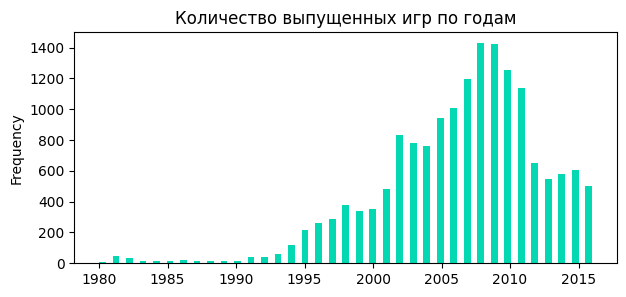

In [38]:
# Построим гистограмму общего количества выпущенных игр по годам
plt.figure(figsize=(7, 3))
df['year_of_release'].plot(kind='hist', bins=73, y='year_of_release', color='#04d8b2')
plt.title('Количество выпущенных игр по годам')

<Axes: >

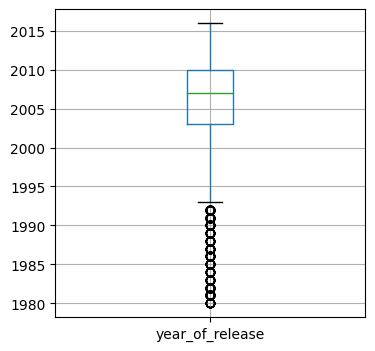

In [39]:
plt.figure(figsize=(4, 4))
df.boxplot('year_of_release')

In [40]:
df['year_of_release'].describe()

count    16458.000000
mean      2006.484992
std          5.873589
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Мы видим, что 50% всех игр было выпущено с 2003 по 2010 годы - это пик популярности и развития видеоигр. После 2011 года заметен значительный спад в их производстве. Можно предположить, что это связано с возросшей популярностью смартфонов и переход к играм из AppStore и GooglePlay.

Очевидно, что данные из 20 века и начала 21 века вряд ли помогут нам спланировать рекламные кампании на 2017 год - для этого нам понадобятся более *актуальный период*. Мы сможем определить более чёткие рамки этого периода на одном из следующих шагов нашего исследования.

Теперь посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.07
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.54
9,3DS,257.81


<Figure size 700x300 with 0 Axes>

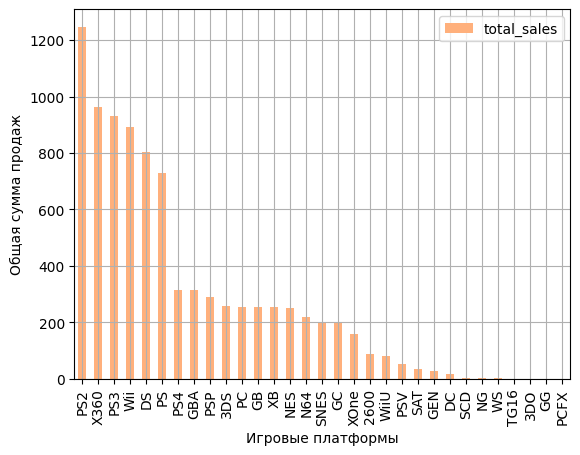

In [41]:
platform_grouped = (df
    .groupby('platform', as_index=False)['total_sales']
    .sum()
    .sort_values(by='total_sales', 
                 ascending=False)
    .reset_index(drop=True)
)
plt.figure(figsize=(7, 3))
platform_grouped.plot(kind='bar', 
                      x='platform', 
                      y='total_sales',
                      color='#ffb07c', 
                      grid=True)
plt.xlabel('Игровые платформы')
plt.ylabel('Общая сумма продаж')
plt.show
platform_grouped.head(10)

Мы видим, что 6 платформ лидируют в продажах с большим отрывом. 
Сохраним ТОП-10 платформ с наибольшей суммой продаж за все время наблюдения. Затем построим распределение продаж среди этих платформ по годам.

Text(0.5, 1.0, 'Распределение продаж по годам')

<Figure size 700x300 with 0 Axes>

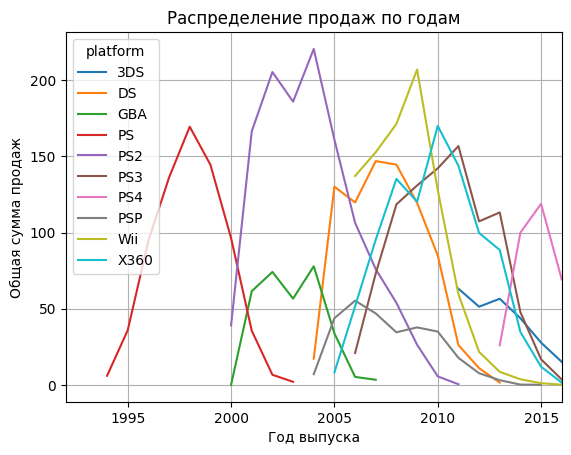

In [42]:
biggest_platforms = platform_grouped['platform'][platform_grouped['total_sales'] > 256].tolist()

platforms_life = (df.query('platform in @biggest_platforms')
                    .pivot_table(index='year_of_release', 
                                 values='total_sales', 
                                 columns='platform', 
                                 aggfunc='sum')
)
plt.figure(figsize=(7, 3))
platforms_life.plot(grid=True, 
                    style='-', 
                    xlim=(1992, 2016))
plt.xlabel('Год выпуска')
plt.ylabel('Общая сумма продаж')   
plt.title('Распределение продаж по годам')

Мы видим, что за последние 6 лет наблюдений, с 2010 по 2016 год, регулярно выпускались игры только на 4 платформах из числа самых высокоприбыльных. Остальные платформы к этому моменту либо совсем прекратили выпускать игры, либо сумма продаж постепенно сходила на нет.   
Вычислим среднюю продолжительность жизни игровых платформ.

In [43]:
print(f'Продолжительность жизни популярных платформ: {platforms_life.count()}')
print(f'Средняя продолжительность жизни платформ: {int(platforms_life.count().mean())}')

Продолжительность жизни популярных платформ: platform
3DS      6
DS      11
GBA      8
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
Wii     11
X360    12
dtype: int64
Средняя продолжительность жизни платформ: 9


*Первые выводы*:
1. Пик популярности и развития видеоигр приходится на период с 2003 по 2010 годы, при этом после 2011 года происходит резкий спад в их производстве.
2. Характерный срок, за который появляются и исчезают крупные игровые платформы - 9 лет.

Мы можем определить рамки **актуального периода**, который мы будем изучать для построения прогноза успешных рекламных кампаний на 2017 год -- с 2014 по 2016 год.
Брать в расчёт данные до спада в производстве и продажах было бы не справедливо, так как эти "хорошие" данные они могут исказить выводы.   
Также мы видим, что к 2014 году большинство крупных игровых платформ как минимум пошли на спад, а некоторые вовсе перестали производить игры.   
Также мы будем осторожно относиться к данным за 2016 год - из документации нам известно, что данные за этот год неполные. Частичное отсутствие данных также может исказить аналитические показатели.

In [44]:
actual_df = df.query('year_of_release >= 2014')

### Изучим, какие платформы лидируют по продажам, растут или падают за актуальный период.

Text(0.5, 1.0, 'Продажи за актуальный период')

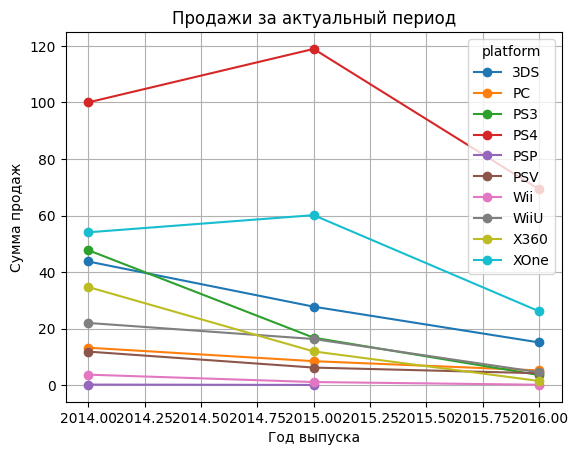

In [45]:
(actual_df
    .pivot_table(values='total_sales', 
                      columns='platform',
                      index='year_of_release',
                      aggfunc='sum')
    .plot(grid=True, style='o-')
)
plt.xlabel('Год выпуска')
plt.ylabel('Сумма продаж')
plt.title('Продажи за актуальный период')

In [46]:
(actual_df.pivot_table(values='total_sales', 
                      columns='platform',
                      index='year_of_release',
                      aggfunc='sum')
          .style.background_gradient(axis=None, cmap='YlOrRd'))

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.760000,13.280000,47.760000,100.000000,0.240000,11.900000,3.750000,22.030000,34.740000,54.070000
2015,27.780000,8.520000,16.820000,118.900000,0.120000,6.250000,1.140000,16.350000,11.960000,60.140000
2016,15.140000,5.250000,3.600000,69.250000,nan,4.250000,0.180000,4.600000,1.520000,26.150000


Мы видим, что за последние 3 года наблюдений 1 компания полностью прекратила выпускать игры:
- PlayStation Portable (PSP)

Поддержка этой игровой платформы была полностью прекращена в 2015 году. 

Тенденцию к спаду в сумме продаж, или практически полное исчезновение с рынка, мы можем наблюдать у следующих платформ:
- Nintendo Wii
- Xbox 360
- PlayStation 3

Лидирующие позиции на конец актуального периода занимают игровые платформы нового поколения:
- PlayStation 4
- Xbox One

Платформа *3DS* обретает тенденцию к спаду по ежегодной сумме продаж, но пока остается на плаву.

Построим график «ящик с усами» по глобальным продажам игр лидирующих платформам.

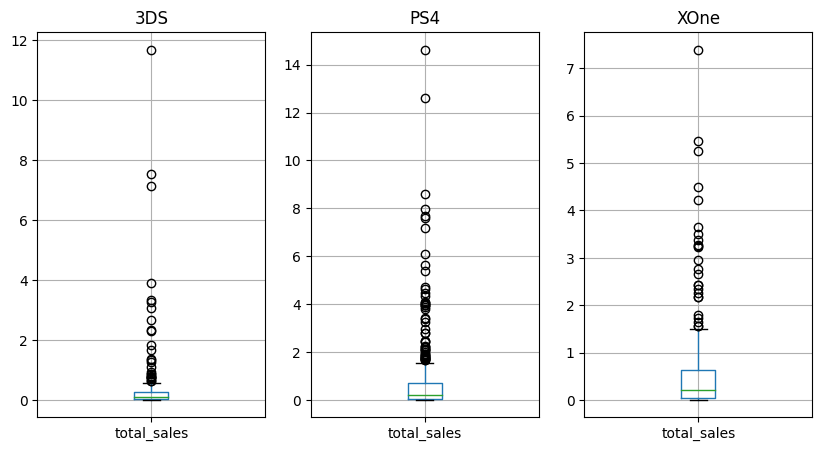

<Figure size 1200x500 with 0 Axes>

In [47]:
i = 1
fig = plt.figure(figsize=(10, 5))
for platform in ['3DS', 'PS4', 'XOne']:
    ax = fig.add_subplot(1,3,i)
    actual_df.query('platform == @platform').boxplot('total_sales')
    plt.title(platform)
    i+=1
    if i > 3:
        i = 1
        fig = plt.figure(figsize=(12, 5))

Рассмотрим чуть ближе отрезки, на которых расположены межквартильные размахи -- сузим графики до 2 млн.

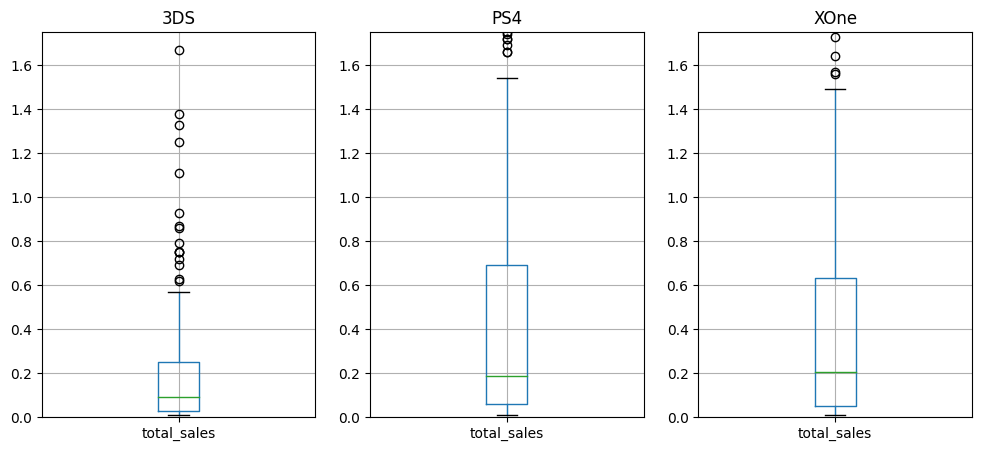

<Figure size 1200x500 with 0 Axes>

In [48]:
i = 1
fig = plt.figure(figsize=(12, 5))
for platform in ['3DS', 'PS4', 'XOne']:
    ax = fig.add_subplot(1,3,i)
    actual_df.query('platform == @platform').boxplot('total_sales')
    plt.ylim(0, 1.75)
    plt.title(platform)
    i+=1
    if i > 3:
        i = 1
        fig = plt.figure(figsize=(12, 5))

Общие выводы:
1. 75% игр всех трёх платформ в глобальных продажах не превышают 1,5 млн, а в 50% не превышает 200-250 тысяч. То есть бОльшая часть игр не приносит огромных средств.
2. Основную часть прибыли компаниям приносят единичные игры-хиты -- на графике они определены точками как выбросы. Их глобальные продажи превышают медианные значения в десятки раз.

### Изучим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков.  
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для изучения возьмем самую популярную платформу на конец актуального периода -- **PlayStation 4**.  

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Коэффициент корреляции между отзывами критиков и продажами игр платформы PS4: 0.40266141068104083


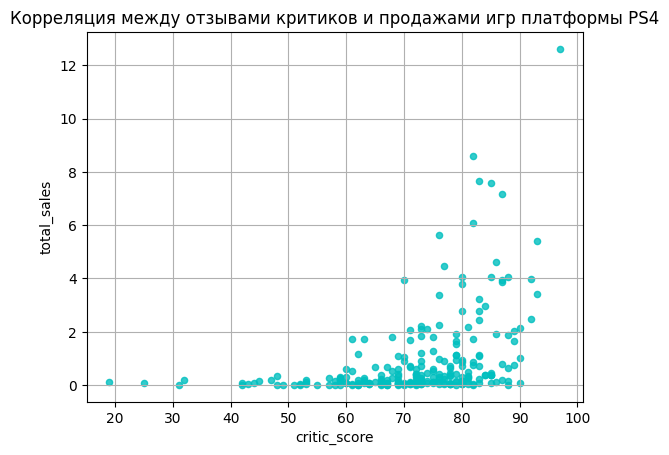

In [49]:
# Выделим данные игр платформы PS4 в отдельный датафрейм
ps4_df = actual_df[actual_df['platform'] == 'PS4']

# Построим диаграмму рассеивания и выведем коэффициет корреляции
# между отзывами критиков и продажами
ps4_df.plot(kind='scatter', 
            x='critic_score', 
            y='total_sales', 
            alpha=0.8, 
            color='c', 
            grid=True)
plt.title('Корреляция между отзывами критиков и продажами игр платформы PS4')
plt.show
print(f"Коэффициент корреляции между отзывами критиков и продажами игр платформы PS4: {ps4_df['total_sales'].corr(ps4_df['critic_score'])}")

Коэффициент корреляции между отзывами пользователей и продажами игр платформы PS4: -0.040131589472697356


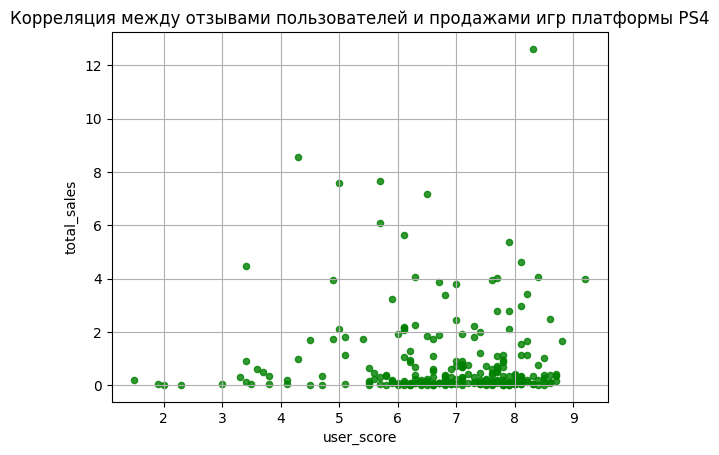

In [50]:
# Построим диаграмму рассеивания и выведем коэффициет корреляции
# между отзывами пользователей и продажами
ps4_df.plot(kind='scatter', 
            x='user_score', 
            y='total_sales', 
            alpha=0.8, 
            color='g', 
            grid=True)
plt.title('Корреляция между отзывами пользователей и продажами игр платформы PS4')
plt.show
print(f"Коэффициент корреляции между отзывами пользователей и продажами игр платформы PS4: {ps4_df['total_sales'].corr(ps4_df['user_score'])}")

Корреляция между отзывами критиков и продажами положительная, ниже среднего, близка к минимальной.  
Между отзывами пользователей и продажами корреляция отрицательная, но фактически отсутствует. 

Возьмем для изучения следующую по популярности платформу -- **Xbox One** 

Коэффициент корреляции между отзывами критиков и продажами игр платформы Xbox One: 0.42867694370333226


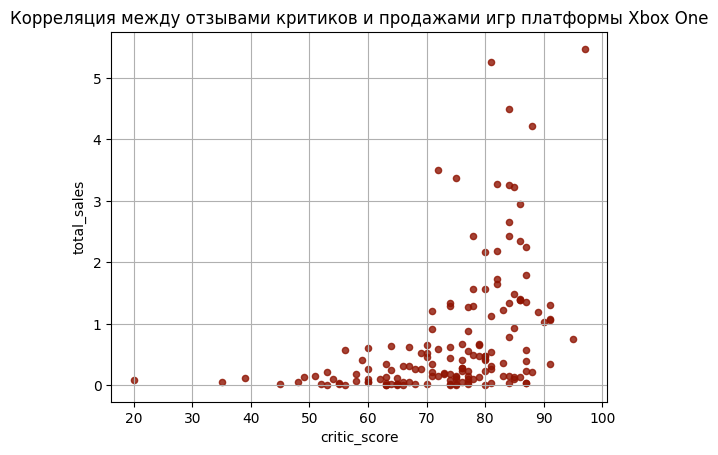

In [51]:
# Выделим данные игр платформы Xbox One в отдельный датафрейм
XOne_df = actual_df[actual_df['platform'] == 'XOne']

# Построим диаграмму рассеивания и выведем коэффициет корреляции
# между отзывами критиков и продажами
XOne_df.plot(kind='scatter', 
            x='critic_score', 
            y='total_sales', 
            alpha=0.8, 
            color='#8f1402', 
            grid=True)
plt.title('Корреляция между отзывами критиков и продажами игр платформы Xbox One')
plt.show
print(f"Коэффициент корреляции между отзывами критиков и продажами игр платформы Xbox One: {XOne_df['total_sales'].corr(XOne_df['critic_score'])}")

Коэффициент корреляции между отзывами пользователей и продажами игр платформы Xbox One: -0.0703839280647581


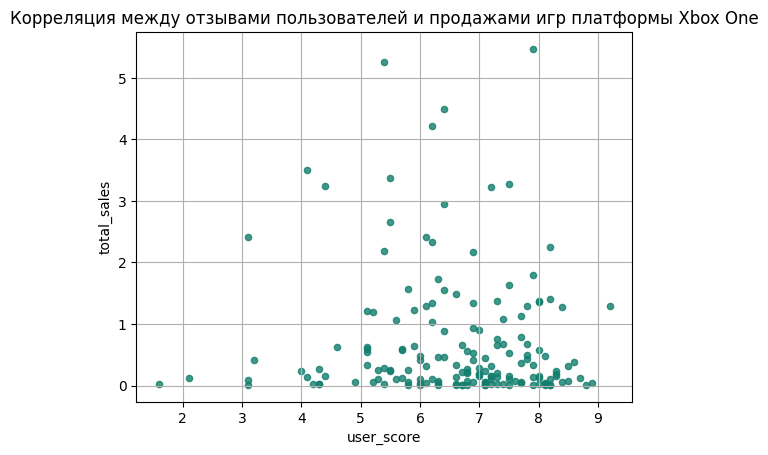

In [52]:
# Построим диаграмму рассеивания и выведем коэффициет корреляции
# между отзывами пользователей и продажами
XOne_df.plot(kind='scatter', 
            x='user_score', 
            y='total_sales', 
            alpha=0.8, 
            color='#137e6d', 
            grid=True)
plt.title('Корреляция между отзывами пользователей и продажами игр платформы Xbox One')
plt.show
print(f"Коэффициент корреляции между отзывами пользователей и продажами игр платформы Xbox One: {XOne_df['total_sales'].corr(XOne_df['user_score'])}")

У игр на платформе Xbox One коэффициенты корреляции между оценками и общими продажами практически полностью совпадают с показателями игр на PlayStation 4

Посмотрим на показатели платформы **3DS**

Коэффициент корреляции между отзывами критиков и продажами игр платформы 3DS: 0.31411749286905105


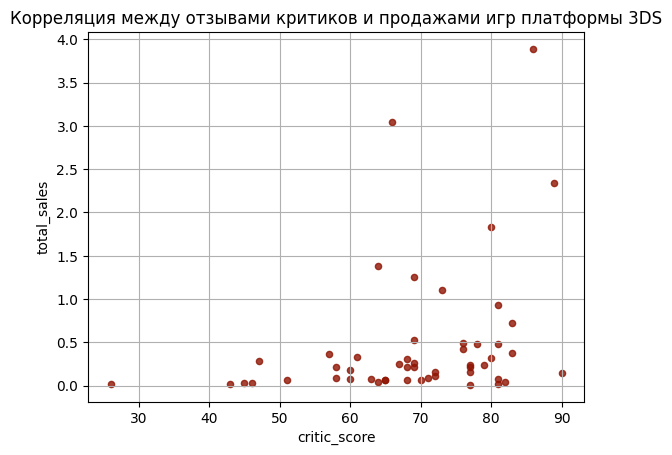

In [53]:
# Выделим данные игр платформы 3DS в отдельный датафрейм
df_3DS = actual_df[actual_df['platform'] == '3DS']

# Построим диаграмму рассеивания и выведем коэффициет корреляции
# между отзывами критиков и продажами
df_3DS.plot(kind='scatter', 
            x='critic_score', 
            y='total_sales', 
            alpha=0.8, 
            color='#8f1402', 
            grid=True)
plt.title('Корреляция между отзывами критиков и продажами игр платформы 3DS')
plt.show
print(f"Коэффициент корреляции между отзывами критиков и продажами игр платформы 3DS: {df_3DS['total_sales'].corr(df_3DS['critic_score'])}")

Коэффициент корреляции между отзывами пользователей и продажами игр платформы 3DS: 0.2151932718527028


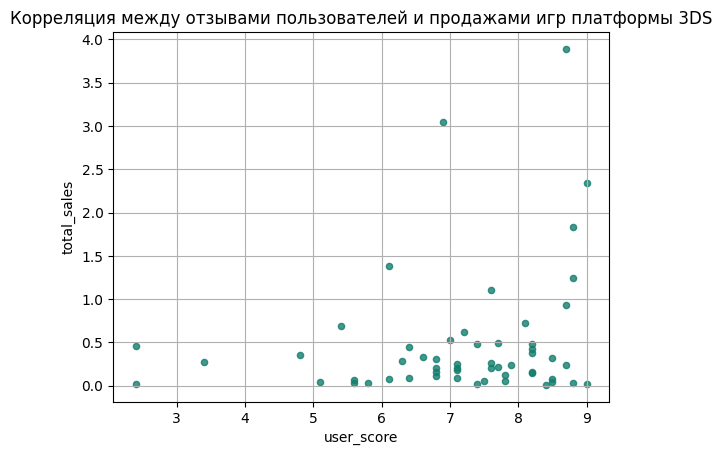

In [54]:
# Построим диаграмму рассеивания и выведем коэффициет корреляции
# между отзывами пользователей и продажами
df_3DS.plot(kind='scatter', 
            x='user_score', 
            y='total_sales', 
            alpha=0.8, 
            color='#137e6d', 
            grid=True)
plt.title('Корреляция между отзывами пользователей и продажами игр платформы 3DS')
plt.show
print(f"Коэффициент корреляции между отзывами пользователей и продажами игр платформы 3DS: {df_3DS['total_sales'].corr(df_3DS['user_score'])}")

На платформе 3DS взаимосвязь между оценками пользователей и критиков и продажами также незначительная. 

*Выводы:*
1. Диаграммы рассеивания всех трёх платформ показывают, что взаимосвязь оценок критиков и общих продаж есть, но она незначительная -- единичные *выбросы* в виде хитовых игр с большими суммами продаж практически всегда имеют хорошие оценки у критиков (от 70 баллов из 100). Но большая часть игр находится на одинаковой планке продаж независимо от того, какие оценки среди критиков они получили.
2. Взаимосвязь оценок пользователей и общих продаж на диаграммах рассеивания всех трёх платформ не прослеживается: игры могут получать "плохие" оценки пользователей, даже если сумма продаж значительно выше медианной.

Значительной взаимосвязи между оценками пользователей и критиков и глобальными продажами **не обнаружено**.

### Посмотрим на общее распределение игр по жанрам: выделяются ли жанры с высокими и низкими продажами, какие жанры можно назвать самыми прибыльными.

Для этого сгруппируем данные за актуальный период по жанрам, определим общую сумму продаж у каждого жанра, количество выпущенных игр, а также медианное значение общей суммы продаж.

In [55]:
genre_pivot = (actual_df
               .pivot_table(index='genre', 
                            values='total_sales', 
                            aggfunc=('sum', 'median', 'count'))
               .sort_values(by='sum', 
                            ascending=False)
               .style.background_gradient(axis=0, cmap='YlGnBu'))
genre_pivot

,count,median,sum
genre,,,
Action,619,0.090000,199.360000
Shooter,128,0.515000,170.940000
Sports,161,0.180000,109.480000
Role-Playing,221,0.110000,101.440000
Misc,113,0.090000,37.550000
Fighting,60,0.125000,28.220000
Racing,69,0.090000,27.520000
Platform,38,0.140000,18.090000
Adventure,185,0.030000,17.550000


*Выводы*
1. Игры в жанре `Action` собрали самую большую сумму глобальных продаж за актуальное время. Но медианное значение глобальных продаж игр в этой категории не входит даже в ТОП-5. Игры в этом жанре лидируют и в количестве - их было выпущено более 600 штук, при этом ни один другой жанр не выпускался в количестве более 250 штук.   
2. `Shooter`'ы занимают вторую строчку по сумме глобальных продаж, при этом они имеют самый высокий медианный показатель глобальных продаж. Игры в этом жанре увереннее занимают свою лидирующую строчку.
3.  Самыми непопулярными жанрами можно назвать `Adventure`, `Strategy` и `Puzzle` - у них самые низкие показатели общей суммы продаж. И не смотря на то, что игры в жанре `Puzzle` имеют самую маленькую общую выручку, игры в жанре `Adventure` можно назвать *наменее успешными*, так как по количеству выпущенных игр они занимают третье место, а медианное значение глобальных продаж у них самое низкое.

## Шаг 4. Составим портрет пользователя каждого региона

На данном шаге исследования нам предстоит:

- Определить для пользователя каждого региона (NA, EU, JP):
  1. Самые популярные платформы (топ-5).  
  2. Самые популярные жанры (топ-5).    
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

### Самые популярные платформы для каждого региона

Для того, чтобы составить рейтинг самых популярных платформ, сгруппируем данные по платформам и определим суммы продаж в каждом регионе, после чего построим круговую диаграмму для каждого региона.

In [56]:

platform_pivot = (actual_df.pivot_table(index='platform', 
                                       values=('na_sales', 
                                               'eu_sales', 
                                               'jp_sales', 
                                               'other_sales'), 
                                       aggfunc='sum')
)
platform_pivot.style.background_gradient(axis=0, cmap='BuPu')

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,16.120000,44.240000,22.640000,3.680000
PC,17.970000,0.000000,7.230000,1.850000
PS3,25.540000,11.220000,22.050000,9.370000
PS4,130.040000,15.020000,98.610000,44.480000
PSP,0.000000,0.360000,0.000000,0.000000
PSV,3.530000,14.540000,2.520000,1.810000
Wii,2.590000,0.000000,2.080000,0.400000
WiiU,13.150000,7.310000,19.360000,3.160000
X360,15.490000,0.080000,28.300000,4.350000


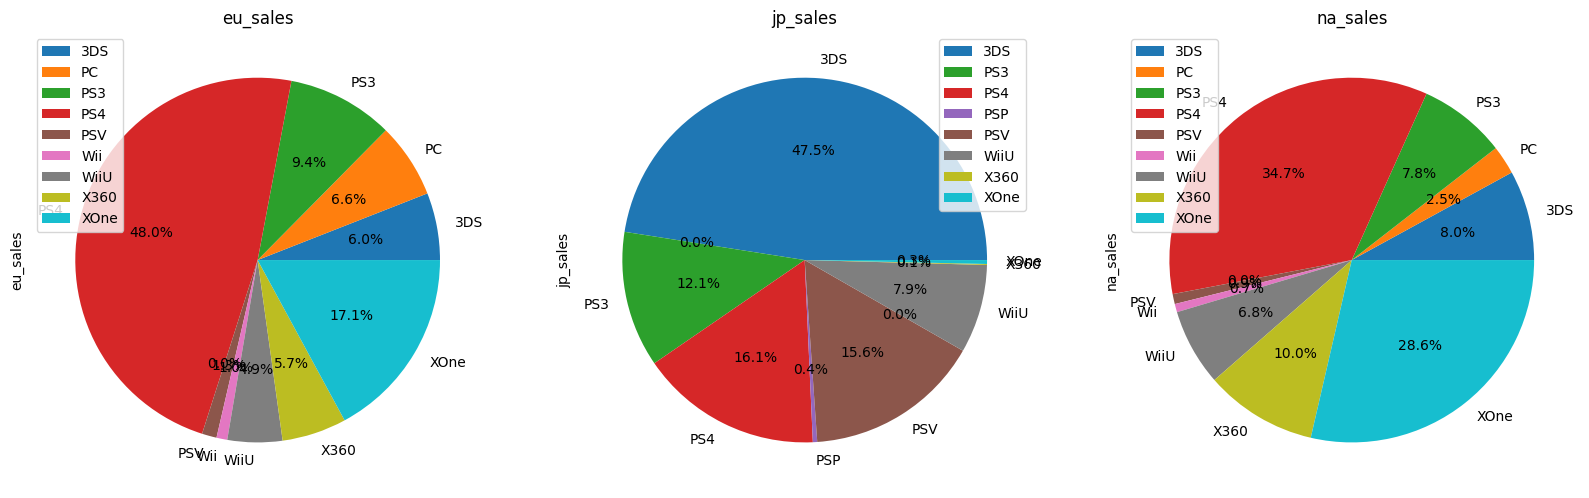

In [57]:
# Построим круговые диаграммы для каждого региона
i = 1
fig = plt.figure(figsize=(20, 10))
for region in ['eu_sales', 'jp_sales', 'na_sales']:
    ax = fig.add_subplot(1,3,i)
    platform_pivot[region].plot(kind='pie', autopct='%1.1f%%')
    plt.title(region)
    plt.legend()
    i+=1

**В Японии** мы видим однозначного фаворита - *3DS* заработала самую большую сумму за актуальный период, платформа лидирует с большим отрывом. На втором месте -- *PlayStation 4*, сумма продаж игр на этой платформе почти в 3 раза меньше, чем у лидера. Также стоит отметить, что продажи игр на платформах *Xbox* в Японии минимальны, в отличае от других регионов.   
**ТОП-5 платформ в Японии:**
1. 3DS
2. PlayStation 4
3. PlayStation Vita
4. PlayStation 3
5. Nintendo Wii U

**В странах Европы** лидируют игры на платформах *PlayStation 4* поколения. Игры на платформе *Xbox One* занимают 2-е место.   
**ТОП-5 платформ Европы:**
1. PlayStation 4
2. Xbox One
3. PC
4. 3DS
5. Xbox 360

**В Северной Америке** также наблюдается конкуренция между платформами *PlayStation* и *Xbox*.  
**ТОП-5 платформ Северной Америки:**
1. PlayStation 4
2. Xbox One
3. Xbox 360
4. 3DS
5. PlayStation 3

В **других регионах** также наблюдается конкуренция между платформами *PlayStation* 3-го и 4-го поколения и *Xbox* поколений 360 и One.

### Самые популярные жанры для каждого региона

Сгруппируем данные по жанрам игр и определим суммы продаж в каждом регионе.

In [58]:
genre_pivot = (actual_df.pivot_table(index='genre', 
                                     values=('na_sales', 
                                               'eu_sales', 
                                               'jp_sales', 
                                               'other_sales'), 
                                     aggfunc='sum')
)                    
genre_pivot.style.background_gradient(axis=0, cmap='RdPu')

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,74.680000,29.580000,72.530000,22.570000
Adventure,6.490000,3.600000,5.640000,1.820000
Fighting,6.690000,6.370000,12.430000,2.730000
Misc,12.860000,5.610000,15.050000,4.030000
Platform,6.800000,2.690000,6.790000,1.810000
Puzzle,0.520000,0.930000,0.650000,0.110000
Racing,14.130000,1.760000,8.740000,2.890000
Role-Playing,28.170000,31.160000,33.470000,8.640000
Shooter,65.520000,4.870000,79.020000,21.530000


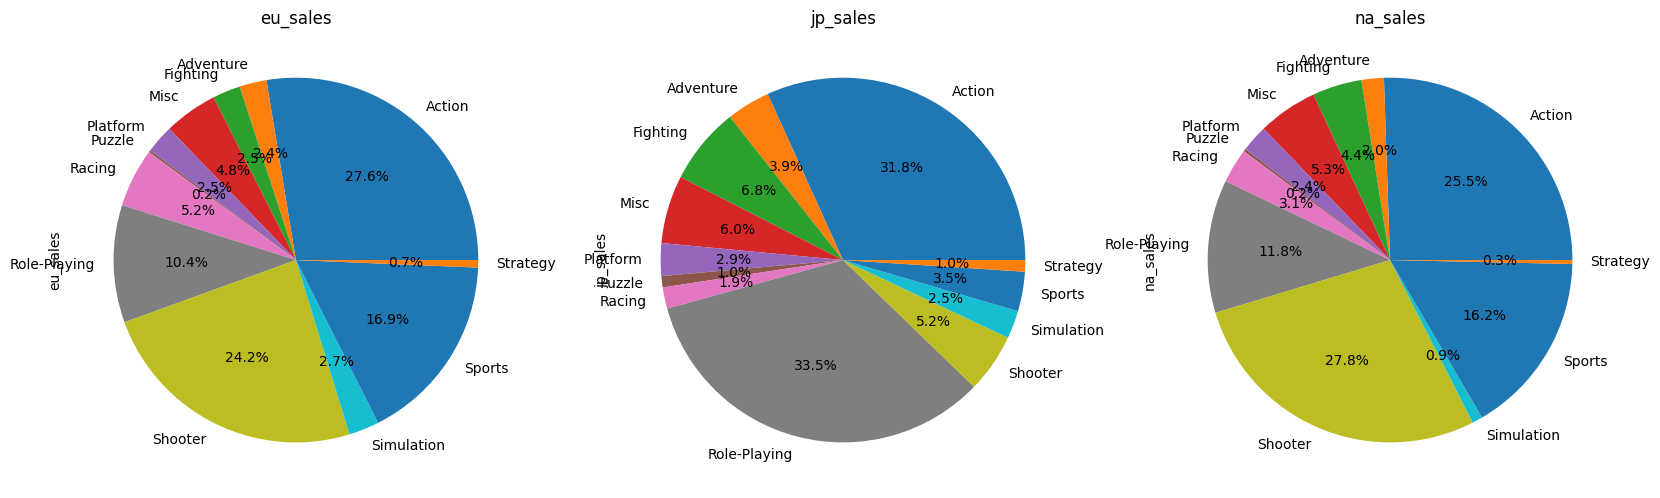

In [59]:
# Построим круговые диаграммы для каждого региона
i = 1
fig = plt.figure(figsize=(20, 10))
for region in ['eu_sales', 'jp_sales', 'na_sales']:
    ax = fig.add_subplot(1,3,i)
    genre_pivot[region].plot(kind='pie', autopct='%1.1f%%')
    plt.title(region)
    i+=1

В Японии наибольшей популярностью обладают игры в жанре *RPG* и *Action*, на 3-м месте - файтинги. Стоит отметить, что в Японии, в отличае от других регионов, не пользуются такой большой популярностью игры в жанре *Shooter* и *Sports*. 

**ТОП-5 жанров в Японии**:
1. Role-Playing
2. Action
3. Fighting
4. Misc
5. Shooter	

В странах Европы и в Северной Америке популярность жанров схожа:

**ТОП-5 жанров в Европе**
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

**ТОП-5 жанров в СЕверной Америке**
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Misc

**В других регионах** также наиболее популярны игры в жанре *Action*, *Shooter*-ы и спортивные игры.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Сгруппируем данные по рейтингу ESRB и определим суммы продаж в каждом регионе.

In [60]:
rating_pivot = (actual_df.pivot_table(index='rating', 
                                      values=('na_sales', 
                                              'eu_sales', 
                                              'jp_sales', 
                                              'other_sales'), 
                                      aggfunc='sum')
)                    
rating_pivot.style.background_gradient(axis=0, cmap='OrRd')

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,58.060000,8.940000,50.740000,15.390000
E10+,26.160000,4.460000,33.230000,7.830000
M,93.440000,8.010000,96.420000,28.670000
NR,58.950000,56.900000,64.720000,18.400000
T,34.070000,14.780000,38.950000,11.330000


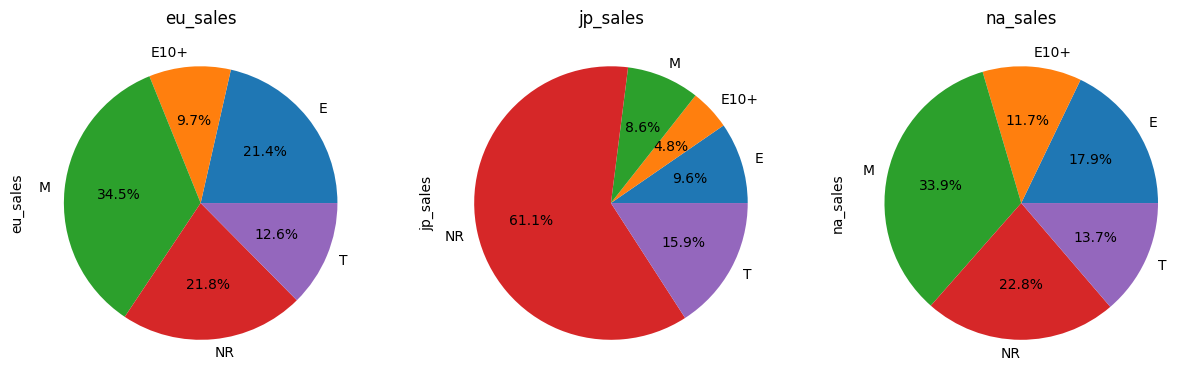

In [61]:
# Построим круговые диаграммы для каждого региона
i = 1
fig = plt.figure(figsize=(15, 15))
for region in ['eu_sales', 'jp_sales', 'na_sales']:
    ax = fig.add_subplot(1,3,i)
    rating_pivot[region].plot(kind='pie', autopct='%1.1f%%')
    plt.title(region)
    i+=1

Напомним, что в колонке с обозначением рейтинга мы встретились с большим количеством пропусков -- мы заменили все эти пропуски на `NR` - 'No Rating'.   
Также напомним, что Entertainment Software Rating Board (ESRB) — негосударственная организация, которая принимает и определяет рейтинги для компьютерных видеоигр и другого развлекательного программного обеспечения в **США и Канаде**.

*В Японии* для большинства игр рейтинг не определён. Мы можем предположить, что в этом регионе наибольшей популярностью обладают игры местного производства, а не игры западных коллег.

*В Европе* и *Северной Америке* самая большая доля приходится на игры "для взрослых" - по 37% от общей суммы продаж. На вторых и третьих местах "игры для всех возрастов" и "игры для подростков". В этих регионах также встречаются пропуски в значении рейтинга, но их значительно меньше, чем в Японии.

### Выводы

1. Во всех регионах в топ платформ входят игры на *PlayStation* 4-го поколения, а также *3DS*. Игры на платформе *Xbox* не имеют успеха в Японии, но в других регионах игры на этой платформе занимают лидирующие позиции.
2. В Японии не стоит делать ставку на шутеры и спортивные игры, там стоит сделать упор на RPG и Action игры. В остальных регионах наиболее популярны Action-игры, шутеры и спортивные игры.   
3. В Японии наибольшим спросом пользуются игры, не имеющие возрастного рейтинга -- вероятнее всего, это местные игры. Для стран Европы и Северной Америки наиболее популярны игры для взрослых и игры для всех возрастов.

## Проверка гипотез

На этом этапе нам предстоит проверить 2 гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC

```
H_0: Средние пользовательские рейтинги (user_score) игр на платформе Xbox One = Средние пользовательские рейтинги (user_score) игр на платформе PC
H_a: Средние пользовательские рейтинги (user_score) игр на платформе Xbox One ≠ Средние пользовательские рейтинги (user_score) игр на платформе PC
alpha = 0.05
```

In [62]:
# В первую очередь, отфильтруем данные, 
# исключим все строки с пропущенными значениями в колонке с оценками пользователей
filtered_df = df[df['user_score'].notnull()]

xone = filtered_df[filtered_df['platform'] == 'XOne']['user_score']
pc = filtered_df[filtered_df['platform'] == 'PC']['user_score']

results = st.ttest_ind(xone, pc, equal_var=False)
# results = вызов метода для проверки гипотезы
alpha = .05
# alpha = задайте значение уровня значимости
print(results.pvalue)
# вывод значения p-value на экран
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

4.5385802963771835e-06
Отвергаем нулевую гипотезу


### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).

```
H_0: Средние пользовательские рейтинги жанров Action Sports = Средние пользовательские рейтинги жанров Sports
H_a: Средние пользовательские рейтинги жанров Action Sports ≠ Средние пользовательские рейтинги жанров Sports
alpha = 0.05
```

In [63]:
action = filtered_df[filtered_df['genre'] == 'Action']['user_score']
sports = filtered_df[filtered_df['genre'] == 'Sports']['user_score']

results = st.ttest_ind(action, sports, equal_var=False)
# results = вызов метода для проверки гипотезы
alpha = .05
# alpha = задайте значение уровня значимости
print(results.pvalue)
# вывод значения p-value на экран
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
# условный оператор с выводом строки с ответом

0.09727725826571139
Не получилось отвергнуть нулевую гипотезу


### Выводы
1. В ходе исследования мы опровергли гипотезу о том, что средние пользовательские рейтинги игр на платформе Xbox One равны средним пользовательским рейтингам игр на платформе PC.
2. Гипотеза о том, что средние пользовательские рейтинги игр в жанрах Action и Sports разные, также была опровергнута.

## Шаг 6. Общие выводы

Подводя итоги нашего исследования, мы можем вынести следующие выводы:

1. Пик популярности и развития видеоигр приходится на 2003-2010 года -- 50% всех игр было выпущено в этом промежутке. После 2011 года заметен значительный спад на рынке.
2. Характерный срок, за который появляются и исчезают крупные игровые платформы - 9 лет.
3. Основную часть прибыли игровым платформам приносят единичные игры-хиты. Большая масса игр не приносит компаниям больших доходов.
4. Наиболее популярные платформы на актуальный период -- *PlayStation 4*, *Xbox One* и *3DS*.
5. Значительной взаимосвязи между оценками пользователей и критиков и глобальными продажами не обнаружено. Взаимосвязь оценок критиков и общих продаж есть, но она незначительная -- единичные *выбросы* в виде хитовых игр с большими суммами продаж практически всегда имеют хорошие оценки у критиков. При этом взаимосвязь между оценками пользователей и общими продажами не прослеживается совсем.
6. Чаще всего выпускаются игры в жанре Action, за счет этого они собирают самую большую сумму глобальных продаж, но по отдельности они собирают не самую большую кассу. Наиболее успешными в этом плане можно назвать игры в жанре Shooter. Игры в жанре Adventure можно назвать наименее успешными.
7. Портреты пользователей из стран Европы и Северной Америки во многом схожи, но Японская аудитория значительно отличается в выборе игровых платформ и жанров игр. Это необходимо учитывать при запуске рекламных кампаний в этом регионе.
8. Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны, была опровергнута.
9. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные, также опровергнута.